In [1]:
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

In [2]:
BASE_DIR = "/gws/nopw/j04/ai4er/users/pn341/climate-rl"
STEPS_DIR = f"{BASE_DIR}/steps"

In [3]:
EXP_VERSION = "v2"

steps_fn = sorted(glob(STEPS_DIR + f"/{EXP_VERSION}*/*/*.pkl"))

In [4]:
import pickle

with open(steps_fn[-1], "rb") as file:
    steps = pickle.load(file)

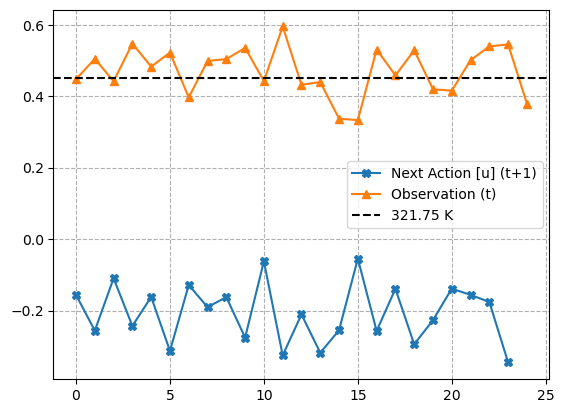

In [5]:
plt.plot(
    [x["actions"][0][0] for x in steps[-24:]],
    label="Next Action [u] (t+1)",
    marker="X",
)
plt.plot(
    [x["next_obs"][0][0] for x in steps[-25:]],
    label="Observation (t)",
    marker="^",
)
plt.axhline(y=0.45, c="k", ls="--", label="321.75 K")
plt.grid(True, ls="--")
plt.legend()
plt.show()